In [ ]:
#multisample

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the PINN model
# class PINN(nn.Module):
#     def __init__(self):
#         super(PINN, self).__init__()
#         self.fc1 = nn.Linear(4, 50)
#         self.fc2 = nn.Linear(50, 50)
#         self.fc3 = nn.Linear(50, 1)

#     def forward(self, x, y, z, t):
#         inputs = torch.cat([x, y, z, t], dim=1)
#         x = torch.tanh(self.fc1(inputs))
#         x = torch.tanh(self.fc2(x))
#         c = self.fc3(x)
#         return c

# # Define the physics-informed loss function
# def pde_loss(pinn, x, y, z, t, u, R, E, S):
#     x.requires_grad_(True)
#     y.requires_grad_(True)
#     z.requires_grad_(True)
#     t.requires_grad_(True)

#     c = pinn(x, y, z, t)

#     c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_z = torch.autograd.grad(c, z, grad_outputs=torch.ones_like(c), create_graph=True)[0]

#     c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True)[0]
#     c_yy = torch.autograd.grad(c_y, y, grad_outputs=torch.ones_like(c_y), create_graph=True)[0]
#     c_zz = torch.autograd.grad(c_z, z, grad_outputs=torch.ones_like(c_z), create_graph=True)[0]

#     u_x, u_y, u_z = u[:, 0:1], u[:, 1:2], u[:, 2:3]

#     K_xx, K_yy, K_zz = 1.0, 1.0, 1.0  # Example values for diffusion coefficients
#     diffusion = K_xx * c_xx + K_yy * c_yy + K_zz * c_zz

#     # PDE residual
#     residual = c_t + u_x * c_x + u_y * c_y + u_z * c_z - diffusion - R - E + S

#     return torch.mean(residual ** 2)

# # Generate synthetic training data
# num_samples = 1000
# x_train = torch.rand(num_samples, 1)
# y_train = torch.rand(num_samples, 1)
# z_train = torch.rand(num_samples, 1)
# t_train = torch.rand(num_samples, 1) * 24  # Time from 0 to 24 hours
# u_train = torch.rand(num_samples, 3)
# R_train = torch.rand(num_samples, 1)
# E_train = torch.rand(num_samples, 1)
# S_train = torch.rand(num_samples, 1)
# c_train = torch.rand(num_samples, 1)

# # Initialize the PINN model
# pinn = PINN()

# # Optimizer
# optimizer = optim.Adam(pinn.parameters(), lr=0.001)

# # Training loop
# epochs = 1000
# for epoch in range(epochs):
#     optimizer.zero_grad()

#     # Compute PINN loss
#     loss = pde_loss(pinn, x_train, y_train, z_train, t_train, u_train, R_train, E_train, S_train)

#     loss.backward()
#     optimizer.step()

#     if epoch % 100 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')

# # Prediction for plotting
# t_test = torch.linspace(0, 24, 100).unsqueeze(1)
# x_test = torch.zeros_like(t_test)
# y_test = torch.zeros_like(t_test)
# z_test = torch.zeros_like(t_test)

# predicted_c = pinn(x_test, y_test, z_test, t_test).detach().numpy()

# # Plot results
# plt.plot(t_test.numpy(), predicted_c, label='Predicted Concentration')
# plt.xlabel('Time (hours)')
# plt.ylabel('Concentration')
# plt.legend()
# plt.show()


#combin

# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Define the PINN model
# class PINN(nn.Module):
#     def __init__(self):
#         super(PINN, self).__init__()
#         self.fc1 = nn.Linear(2, 50)
#         self.fc2 = nn.Linear(50, 50)
#         self.fc3 = nn.Linear(50, 1)

#     def forward(self, x, t):
#         inputs = torch.cat([x, t], dim=1)
#         x = torch.tanh(self.fc1(inputs))
#         x = torch.tanh(self.fc2(x))
#         c = self.fc3(x)
#         return c

# # Define the data-driven model
# class DataDrivenModel(nn.Module):
#     def __init__(self):
#         super(DataDrivenModel, self).__init__()
#         self.fc1 = nn.Linear(5, 50)  # Example input size of 5
#         self.fc2 = nn.Linear(50, 50)
#         self.fc3 = nn.Linear(50, 1)

#     def forward(self, additional_features):
#         x = torch.tanh(self.fc1(additional_features))
#         x = torch.tanh(self.fc2(x))
#         adjustment = self.fc3(x)
#         return adjustment

# # Define the combined model
# class CombinedModel(nn.Module):
#     def __init__(self, pinn, data_model):
#         super(CombinedModel, self).__init__()
#         self.pinn = pinn
#         self.data_model = data_model

#     def forward(self, x, t, additional_features):
#         c_pinn = self.pinn(x, t)
#         adjustment = self.data_model(additional_features)
#         c_total = c_pinn + adjustment
#         return c_total

# # Define the physics-informed loss function
# def pde_loss(pinn, x, t, u, R, E, S):
#     x.requires_grad_(True)
#     t.requires_grad_(True)
#     c = pinn(x, t)

#     c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True)[0]

#     u_x, u_y, u_z = u[:, 0], u[:, 1], u[:, 2]

#     K_xx, K_yy, K_zz = 1.0, 1.0, 1.0
#     diffusion = K_xx * c_xx

#     residual = c_t + u_x * c_x + u_y * c_x + u_z * c_x - diffusion - R - E + S

#     return torch.mean(residual ** 2)

# # Training data (placeholder, replace with actual data)
# x_train = torch.rand(1000, 1)
# t_train = torch.rand(1000, 1)
# u_train = torch.rand(1000, 3)
# R_train = torch.rand(1000, 1)
# E_train = torch.rand(1000, 1)
# S_train = torch.rand(1000, 1)
# additional_features_train = torch.rand(1000, 5)
# c_train = torch.rand(1000, 1)

# # Initialize models
# pinn = PINN()
# data_model = DataDrivenModel()
# combined_model = CombinedModel(pinn, data_model)

# # Optimizer
# optimizer = optim.Adam(combined_model.parameters(), lr=0.001)

# # Training loop
# epochs = 1000
# for epoch in range(epochs):
#     optimizer.zero_grad()

#     # Compute PINN loss
#     pinn_loss = pde_loss(pinn, x_train, t_train, u_train, R_train, E_train, S_train)

#     # Compute data-driven model loss
#     predicted_c = combined_model(x_train, t_train, additional_features_train)
#     data_loss = nn.MSELoss()(predicted_c, c_train)

#     # Total loss
#     total_loss = pinn_loss + data_loss

#     total_loss.backward()
#     optimizer.step()

#     if epoch % 100 == 0:
#         print(f'Epoch {epoch}, Loss: {total_loss.item()}')

# # Prediction
# t_test = torch.linspace(0, 24, 100).unsqueeze(1)
# x_test = torch.zeros_like(t_test)
# additional_features_test = torch.rand(100, 5)
# predicted_c = combined_model(x_test, t_test, additional_features_test)


# plt.plot(t_test.numpy(), predicted_c.detach().numpy(), label='Predicted Concentration')
# plt.xlabel('Time (hours)')
# plt.ylabel('Concentration')
# plt.legend()
# plt.show()

ctm

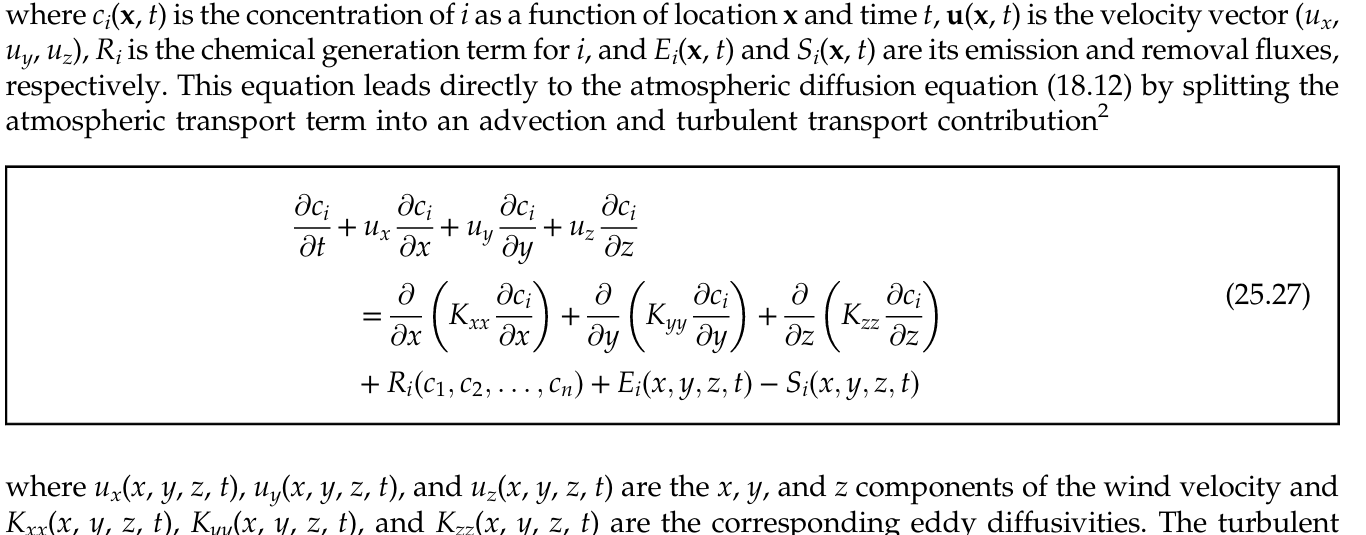

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import torch

In [ ]:
ds = xr.open_dataset('/content/adaptor.mars.internal-1718304314.6255913-25681-12-7ac2a12f-7fff-4ca3-a7b8-193f9ad8f24c.nc')

In [ ]:
newds=ds.sel(longitude=-99.14, latitude=19.43, method='nearest')

wind in m/s

In [ ]:
df = newds.to_dataframe()
df

NameError: name 'newds' is not defined

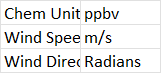

In [ ]:
dataf = pd.read_excel('/content/cf_assim_no2_20240514_18.75x-98.75.xlsx')
dataf = dataf.iloc[432:455]
dataf

,time,NO2,w_time,U10M,V10M,total_wind,wind_direction
432,2024-06-01T00:30:00,2.019085,2024-06-01T00:30:00,-1.383916,1.546250,2.075118,-0.840743
433,2024-06-01T01:30:00,3.587054,2024-06-01T01:30:00,-2.087899,1.468176,2.552423,-0.612859
434,2024-06-01T02:30:00,4.169131,2024-06-01T02:30:00,-3.016206,1.240083,3.261181,-0.390073
435,2024-06-01T03:30:00,4.445617,2024-06-01T03:30:00,-3.058177,0.990214,3.214494,-0.313139
436,2024-06-01T04:30:00,5.100453,2024-06-01T04:30:00,-2.083935,0.783375,2.226311,-0.359570
437,2024-06-01T05:30:00,4.918554,2024-06-01T05:30:00,-1.576061,0.791428,1.763611,-0.465371
438,2024-06-01T06:30:00,4.372857,2024-06-01T06:30:00,-1.439681,0.723033,1.611042,-0.465420
439,2024-06-01T07:30:00,3.856264,2024-06-01T07:30:00,-1.345768,0.387323,1.400397,-0.280234
440,2024-06-01T08:30:00,3.456087,2024-06-01T08:30:00,-1.248872,-0.047373,1.249770,0.037914
441,2024-06-01T09:30:00,3.365137,2024-06-01T09:30:00,-1.169160,-0.374254,1.227600,0.309798


<Axes: xlabel='index', ylabel='NO2'>

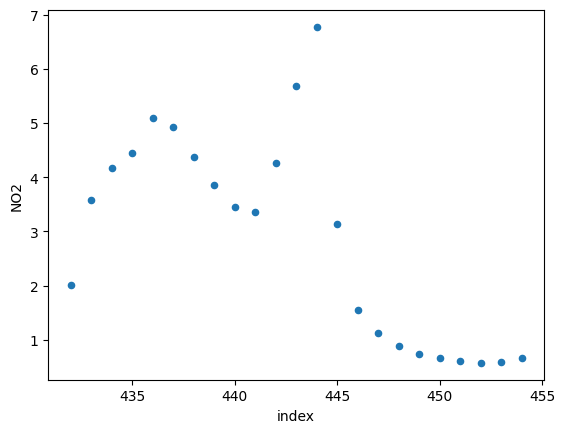

In [ ]:
dataf.reset_index().plot(kind='scatter', x='index', y='NO2')

training the model on typical values of the parameters

Epoch 0, Loss: 3974.973012924802
Epoch 1000, Loss: 10.996849940484923
Epoch 2000, Loss: 9.65566709079569
Epoch 3000, Loss: 9.09920264199799
Epoch 4000, Loss: 9.508671078242042
Epoch 5000, Loss: 8.130749599552122
Epoch 6000, Loss: 7.595413267622504
Epoch 7000, Loss: 7.0761820259690795
Epoch 8000, Loss: 6.582736713004719
Epoch 9000, Loss: 5.739291639995776
Epoch 10000, Loss: 4.761816601631465
Epoch 11000, Loss: 4.024387816356304
Epoch 12000, Loss: 3.52385633729008
Epoch 13000, Loss: 3.0768847986882073
Epoch 14000, Loss: 2.4578831154490985
Epoch 15000, Loss: 0.7623386884411347
Epoch 16000, Loss: 0.21095841751759375
Epoch 17000, Loss: 0.2018726539728925
Epoch 18000, Loss: 0.19545348420782763
Epoch 19000, Loss: 0.18819343615873343


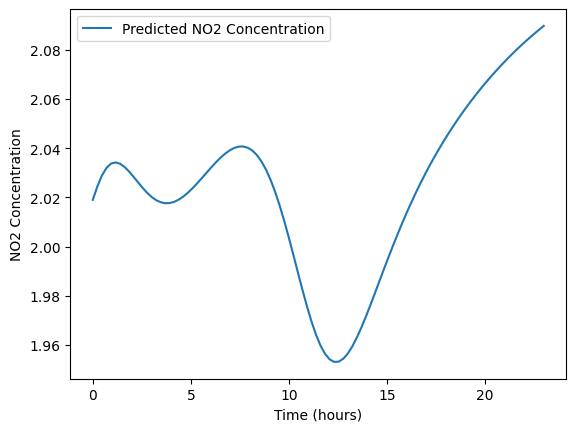

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x, y, t):
        inputs = torch.cat([x, y, t], dim=1)
        x = torch.tanh(self.fc1(inputs))
        x = torch.tanh(self.fc2(x))
        c = self.fc3(x)
        return c

# Define the physics-informed loss function
def pde_loss(pinn, x, y, t, u, R, S,E):
    x.requires_grad_(True)
    y.requires_grad_(True)
    t.requires_grad_(True)

    c = pinn(x, y, t)

    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True)[0]
    c_yy = torch.autograd.grad(c_y, y, grad_outputs=torch.ones_like(c_y), create_graph=True)[0]



    K_xx, K_yy = 5, 5  # Example values for diffusion coefficients
    diffusion = K_xx * c_xx + K_yy * c_yy

    # PDE residual'
    u_x, u_y = u[:, 0:1]*1000, u[:, 1:2]*1000
    residual = c_t + u_x * c_x + u_y * c_y - diffusion - R + S - E

    loss1 = torch.mean(residual ** 2)

    t_boundary= torch.zeros_like(t).requires_grad_(True)
    i = pinn(x,y,t_boundary)
    loss2 = torch.mean((torch.squeeze(i)-2.019)**2)
    return loss1+loss2

# Generate synthetic training data for one sample

num_samples = 23
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
#x_train =torch.linspace(0,1,num_samples)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
#y_train =torch.linspace(0,1,num_samples)
t_train = torch.linspace(0, 23, num_samples).unsqueeze(1)  # Time from 0 to 21 hours
u_train = torch.tensor(dataf[['U10M','V10M']].values)  # Hourly wind velocity in x and y directions
R = torch.full((23,),50)  # Constant value for R
S = torch.full((23,),125)   # Constant value for S
E = torch.full((23,),150)


# Initialize the PINN model
pinn = PINN()

# Optimizer
optimizer = optim.Adam(pinn.parameters(), lr=0.001)

# Training loop
epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Compute PINN loss
    loss = pde_loss(pinn, x_train, y_train, t_train, u_train, R, S,E)

    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
x_test = torch.zeros_like(t_test)
y_test = torch.zeros_like(t_test)

predicted_c = pinn(x_test, y_test, t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


training on changed values - commented it as it may have some incohenrency in the units of the data and emission term is not correctly included

Epoch 0, Loss: 5.131440248222999
Epoch 1000, Loss: 1.2599326423581545e-05
Epoch 2000, Loss: 5.687565989350705e-07
Epoch 3000, Loss: 1.610312774772822e-07
Epoch 4000, Loss: 6.458255134271193e-08
Epoch 5000, Loss: 3.4050401818402336e-08
Epoch 6000, Loss: 1.8796307587193766e-08
Epoch 7000, Loss: 1.5454308438400728e-08
Epoch 8000, Loss: 4.079649535304705e-08
Epoch 9000, Loss: 5.102048306587969e-06


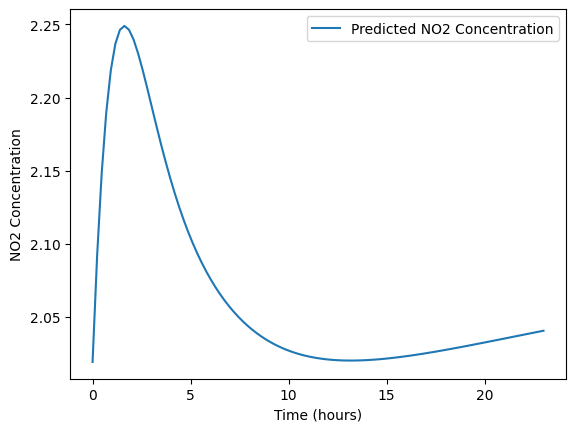

In [ ]:


# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt

# # Define the PINN model
# class PINN(nn.Module):
#     def __init__(self):
#         super(PINN, self).__init__()
#         self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
#         self.fc2 = nn.Linear(50, 50)
#         self.fc3 = nn.Linear(50, 1)

#     def forward(self, x, y, t):
#         inputs = torch.cat([x, y, t], dim=1)
#         x = torch.tanh(self.fc1(inputs))
#         x = torch.tanh(self.fc2(x))
#         c = self.fc3(x)
#         return c

# # Define the physics-informed loss function
# def pde_loss(pinn, x, y, t, u, R, S):
#     x.requires_grad_(True)
#     y.requires_grad_(True)
#     t.requires_grad_(True)

#     c = pinn(x, y, t)

#     c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
#     c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]

#     c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True)[0]
#     c_yy = torch.autograd.grad(c_y, y, grad_outputs=torch.ones_like(c_y), create_graph=True)[0]



#     K_xx, K_yy = 1.0, 1.0  # Example values for diffusion coefficients
#     diffusion = K_xx * c_xx + K_yy * c_yy

#     # PDE residual'
#     u_x, u_y = u[:, 0:1]*1000, u[:, 1:2]*1000
#     residual = c_t + u_x * c_x + u_y * c_y - diffusion - R + S

#     loss1 = torch.mean(residual ** 2)

#     t_boundary= torch.zeros_like(t).requires_grad_(True)
#     i = pinn(x,y,t_boundary)
#     loss2 = torch.mean((torch.squeeze(i)-2.019)**2)
#     return loss1+loss2

# # Generate synthetic training data for one sample

# num_samples = 23
# x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
# y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
# t_train = torch.linspace(0, 23, num_samples).unsqueeze(1)  # Time from 0 to 21 hours
# u_train = torch.tensor(dataf[['U10M','V10M']].values)  # Hourly wind velocity in x and y directions
# R = torch.tensor(0.1)  # Constant value for R
# S = torch.tensor(0.05)  # Constant value for S

# #ppbv = ug/m3 *24.45/molec weight
# # Initialize the PINN model
# pinn = PINN()

# # Optimizer
# optimizer = optim.Adam(pinn.parameters(), lr=0.001)

# # Training loop
# epochs = 10000
# for epoch in range(epochs):
#     optimizer.zero_grad()

#     # Compute PINN loss
#     loss = pde_loss(pinn, x_train, y_train, t_train, u_train, R, S)

#     loss.backward()
#     optimizer.step()

#     if epoch % 1000 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')

# # Prediction for plotting
# t_test = torch.linspace(0, 23, 100).unsqueeze(1)
# x_test = torch.zeros_like(t_test)
# y_test = torch.zeros_like(t_test)

# predicted_c = pinn(x_test, y_test, t_test).detach().numpy()

# # Plot results
# plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
# plt.xlabel('Time (hours)')
# plt.ylabel('NO2 Concentration')
# plt.legend()
# plt.show()


In [ ]:
# plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
# time = dataf.index.values - np.full(23,432)
# plt.scatter(time, dataf['NO2'])
# plt.xlabel('Time (hours)')
# plt.ylabel('NO2 Concentration')
# plt.legend()
# plt.show()
# print(len(t_test.numpy()))
# dataf['NO2'].head(22)

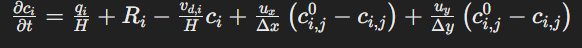

r - 4.7035

vd - 18

h - 500 to 3000

qi - 18000 ug/m2/hr

x- 1000

y-1000

ci - 3.8


Epoch 0, Loss: 248.43951498328298
Epoch 1000, Loss: 20.413496367599922
Epoch 2000, Loss: 11.054062277148093
Epoch 3000, Loss: 5.20589503042456
Epoch 4000, Loss: 1.7300934749403023
Epoch 5000, Loss: 0.7223210046000312
Epoch 6000, Loss: 0.1137929830534918
Epoch 7000, Loss: 0.060823668366723004
Epoch 8000, Loss: 0.024980704466028614
Epoch 9000, Loss: 0.0014274016199028869


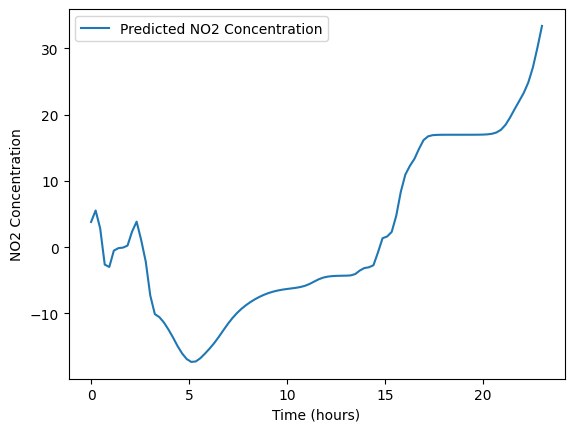

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x, y, t):
        inputs = torch.cat([x, y, t], dim=1)
        x = torch.tanh(self.fc1(inputs))
        x = torch.tanh(self.fc2(x))
        c = self.fc3(x)
        return c

# Constants
H = 1500  # Height
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

num_samples = 23
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
t_train = torch.linspace(0, 23, num_samples).unsqueeze(1)  # Time from 0 to 21 hours
u_train = torch.tensor(dataf[['U10M','V10M']].values)  # Hourly wind velocity in x and y directions

# Define the physics-informed loss function
def loss_function(model, x, y, t, c_initial, q_i, R_i):
    x.requires_grad_(True)
    y.requires_grad_(True)
    t.requires_grad_(True)

    c = model(x, y, t)

    c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    u_x, u_y = u_train[:, 0:1]*1000, u_train[:, 1:2]*1000
    loss1 = torch.mean((c_t - (q_i / H + R_i - v_d_i / H * c + u_x / delta_x * (c_initial - c) + u_y / delta_y * (c_initial - c)))**2)



    t_boundary= torch.zeros_like(t).requires_grad_(True)
    i = model(x,y,t_boundary)
    loss2 = torch.mean((torch.squeeze(i)-3.8)**2)
    return loss1+loss2



model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loss_function(model, x_train, y_train, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
x_test = torch.zeros_like(t_test)
y_test = torch.zeros_like(t_test)

predicted_c = model(x_test, y_test, t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


learning the values of unknown parameters

In [ ]:
u_obs = torch.tensor(dataf['NO2'].values)
t_obs = torch.linspace(1,23,23)
t_obs = t_obs.view(-1,1)
u_obs,t_obs

(tensor([2.0191, 3.5871, 4.1691, 4.4456, 5.1005, 4.9186, 4.3729, 3.8563, 3.4561,
         3.3651, 4.2710, 5.6825, 6.7739, 3.1396, 1.5589, 1.1187, 0.8813, 0.7431,
         0.6576, 0.6075, 0.5739, 0.5830, 0.6612], dtype=torch.float64),
 tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.],
         [21.],
         [22.],
         [23.]]))

In [ ]:
u_x_obs, u_y_obs = torch.tensor((dataf['U10M'].values)*1000),torch.tensor((dataf['V10M'].values)*1000)
u_x_obs,u_y_obs

(tensor([-1383.9157, -2087.8992, -3016.2058, -3058.1772, -2083.9348, -1576.0607,
         -1439.6809, -1345.7681, -1248.8717, -1169.1601, -1074.7062,  -963.6454,
          -893.5081, -1380.1929, -1401.2535, -1379.8850, -1479.3838, -1507.9449,
         -1618.2564, -1731.9454, -1999.7075, -2429.4524, -3091.9230],
        dtype=torch.float64),
 tensor([ 1546.2503,  1468.1759,  1240.0825,   990.2136,   783.3750,   791.4280,
           723.0328,   387.3226,   -47.3727,  -374.2543,  -571.0850,  -769.5546,
         -1156.4512,  -497.0029,   631.6071,  1584.4290,  2347.6274,  2750.3715,
          2876.0645,  2983.4385,  3009.3808,  3021.8565,  3186.8472],
        dtype=torch.float64))

Epoch 0, Loss: 589.959740432829
Epoch 1000, Loss: 0.888687743214091
Epoch 2000, Loss: 0.878183223444366
Epoch 3000, Loss: 0.8726841775419025
Epoch 4000, Loss: 0.8704535574829352
Epoch 5000, Loss: 0.8688606096365508
Epoch 6000, Loss: 0.8674830945199414
Epoch 7000, Loss: 0.8659424138886352
Epoch 8000, Loss: 0.86411435847121
Epoch 9000, Loss: 0.8620435191034969


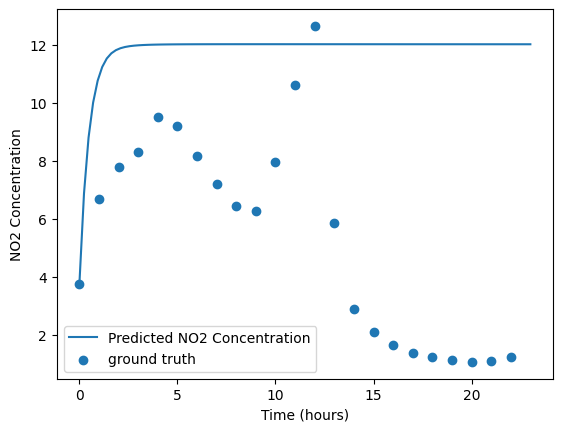

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x, y, t):
        inputs = torch.cat([x, y, t], dim=1)
        x = torch.tanh(self.fc1(inputs))
        x = torch.tanh(self.fc2(x))
        c = self.fc3(x)
        return c

# Constants
#H = 1500  # Height
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

# Treating H,ux,uy as a learnable parameter
H = torch.nn.Parameter(torch.tensor([1500.0], requires_grad=True))
u_x = torch.nn.Parameter(torch.tensor([1000.0], requires_grad=True))
u_y = torch.nn.Parameter(torch.tensor([1000.0], requires_grad=True))

# Lists to store parameter history
Hs = []
u_x_s = []
u_y_s = []


num_samples = 100
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
t_train = torch.linspace(0, 22, num_samples).view(-1,1)  # Time from 0 to 23 hours
u_train = torch.tensor(dataf[['U10M','V10M']].values)  # Hourly wind velocity in x and y directions
x_obs = torch.zeros_like(t_obs)
y_obs = torch.zeros_like(t_obs)

# Define the physics-informed loss function
def loss_function(model, x, y, t, c_initial, q_i, R_i):
    x.requires_grad_(True)
    y.requires_grad_(True)
    t.requires_grad_(True)

    c = model(x, y, t)

    c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    loss1 = torch.mean((c_t - (q_i / H + R_i - v_d_i / H * c + u_x / delta_x * (c_initial - c) + u_y / delta_y * (c_initial - c)))**2)

    # t_boundary= torch.zeros_like(t).requires_grad_(True)
    i = model(x_obs,y_obs,t_obs)
    loss2 = torch.mean((torch.squeeze(i)-u_obs)**2)

    t_boundary= torch.zeros_like(t).requires_grad_(True)
    ls = model(x,y,t_boundary)
    loss3 = torch.mean((torch.squeeze(ls)-3.8)**2)

    return loss1+1e-2*loss2+1e-1*loss3
#the loss was directly proportional to degree of lambda for loss2


model = PINN()
optimizer = optim.Adam(list(model.parameters())+[H,u_x,u_y], lr=0.001)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loss_function(model, x_train, y_train, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    Hs.append(H.item())
    u_x_s.append(u_x.item())
    u_y_s.append(u_y.item())
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
x_test = torch.zeros_like(t_test)
y_test = torch.zeros_like(t_test)

predicted_c = model(x_test, y_test, t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2']*0.04059*46,label = "ground truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


u not as parameter

Epoch 0, Loss: 3948.3413266855714
Epoch 2000, Loss: 43.112951097709775
Epoch 4000, Loss: 43.09985620682327
Epoch 6000, Loss: 42.62343052894137
Epoch 8000, Loss: 42.62244235495566


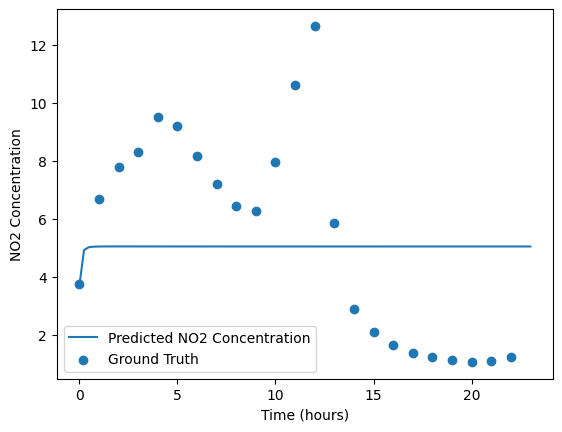

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, x, y, t):
        inputs = torch.cat([x, y, t], dim=1)
        x = torch.tanh(self.fc1(inputs))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        c = self.fc5(x)
        return c

# Constants
H = 1500
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

# Lists to store parameter history
Hs = []

num_samples = 100
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
t_train = torch.linspace(0, 22, num_samples).view(-1, 1)  # Time from 0 to 22 hours

u_x = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['U10M'].values)])  # Convert generator to list
u_y = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['V10M'].values)])  # Convert generator to list# Hourly wind velocity in x and y directions

# Reshape the tensor to [1, 1, 1, 23] to make it compatible with interpolate
u_x = u_x.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_y_n = u_y_n.view(-1)

u_obs = torch.tensor(dataf['NO2'].values)


# Define the physics-informed loss function
def loss_function(model, x, y, t, c_initial, q_i, R_i):
    x.requires_grad_(True)
    y.requires_grad_(True)
    t.requires_grad_(True)

    c = model(x, y, t)

    c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    loss1 = torch.mean((c_t - (q_i / H + R_i - (v_d_i / H) * c + (u_x_n / delta_x) * (c_initial - c) + (u_y_n / delta_y) * (c_initial - c)))**2)

    i = model(x_obs, y_obs, t_obs)
    loss2 = torch.mean((i.squeeze() - u_obs)**2)

    t_boundary = torch.zeros_like(t).requires_grad_(True)
    ls = model(x, y, t_boundary)
    loss3 = torch.mean((torch.squeeze(ls) - 3.8)**2)

    return loss1 + 1e-2 * loss2 + 1e-2 * loss3

model = PINN()
optimizer = optim.Adam(list(model.parameters()), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

# Training loop
for epoch in range(6000):
    optimizer.zero_grad()
    loss = loss_function(model, x_train, y_train, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 2000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
x_test = torch.zeros_like(t_test)
y_test = torch.zeros_like(t_test)

predicted_c = model(x_test, y_test, t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2']*0.04059*46, label="Ground Truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [ ]:
model(x_obs,y_obs,t_obs).shape

torch.Size([23, 1])

Epoch 0, Loss: 92328.85484152191
Epoch 1000, Loss: 4.499450369757357
Epoch 2000, Loss: 3.2715624662485263
Epoch 3000, Loss: 2.5084491200395274
Epoch 4000, Loss: 1.944819131776987
Epoch 5000, Loss: 1.5398833981036537


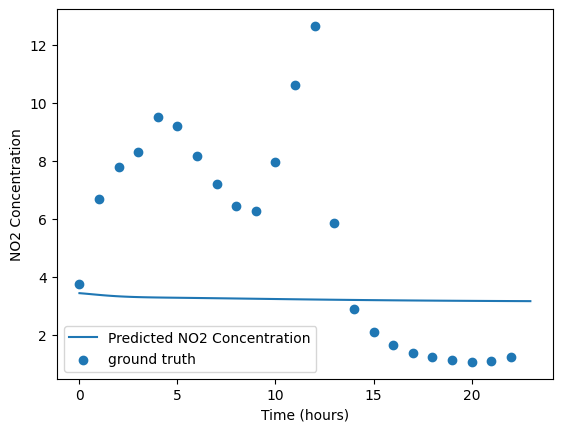

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension: 3 (x, y, t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x, y, t):
        inputs = torch.cat([x, y, t], dim=1)
        x = torch.tanh(self.fc1(inputs))
        x = torch.tanh(self.fc2(x))
        c = self.fc3(x)
        return c

# Define the physics-informed loss function
def pde_loss(pinn, x, y, t, R, S, E):
    x.requires_grad_(True)
    y.requires_grad_(True)
    t.requires_grad_(True)

    c = pinn(x, y, t)

    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True)[0]
    c_y = torch.autograd.grad(c, y, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True)[0]
    c_yy = torch.autograd.grad(c_y, y, grad_outputs=torch.ones_like(c_y), create_graph=True)[0]

    K_xx, K_yy = 5, 5  # Example values for diffusion coefficients
    diffusion = K_xx * c_xx + K_yy * c_yy

    residual = c_t + u_x_n * c_x + u_y_n * c_y - diffusion - R + S - E

    loss1 = torch.mean(residual ** 2)

    i = pinn(x_obs, y_obs, t_obs)
    loss2 = torch.mean((torch.squeeze(i) - u_obs) ** 2)

    t_boundary = torch.zeros_like(t).requires_grad_(True)
    ls = pinn(x, y, t_boundary)
    loss3 = torch.mean((torch.squeeze(ls) - torch.full((100,), 3.8)) ** 2)

    return loss1 + 1e-1 * loss2 + 1e-1 * loss3

# Generate synthetic training data for one sample
num_samples = 100
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
t_train = torch.linspace(0, 22, num_samples).unsqueeze(1)  # Time from 0 to 21 hours

R = torch.full((num_samples, 1), 5)  # Constant value for R, can be made variable if needed
u_x = torch.tensor([i * 3600 if i > 0 else i * -1 * 3600 for i in dataf['U10M'].values])  # Convert generator to list
u_y = torch.tensor([i * 3600 if i > 0 else i * -1 * 3600 for i in dataf['V10M'].values])  # Convert generator to list

u_x = u_x.view(1, 1, -1)
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)
u_y_n = u_y_n.view(-1)

S = torch.full((num_samples, 1), 100.0, requires_grad=True)  # Example: Spatial and temporal varying S
E = torch.full((num_samples, 1), 100.0, requires_grad=True)  # Example: Spatial and temporal varying E
Ss = []
Es = []

# Initialize the PINN model
pinn = PINN()

# Optimizer
optimizer = optim.Adam(list(pinn.parameters()) + [S, E], lr=0.001)

# Training loop
epochs = 6000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Compute PINN loss
    loss = pde_loss(pinn, x_train, y_train, t_train, R, S, E)

    loss.backward()
    optimizer.step()
    Ss.append(S.mean().item())
    Es.append(E.mean().item())
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
x_test = torch.zeros_like(t_test)
y_test = torch.zeros_like(t_test)

predicted_c = pinn(x_test, y_test, t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2'] * 0.04059 * 46, label="ground truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


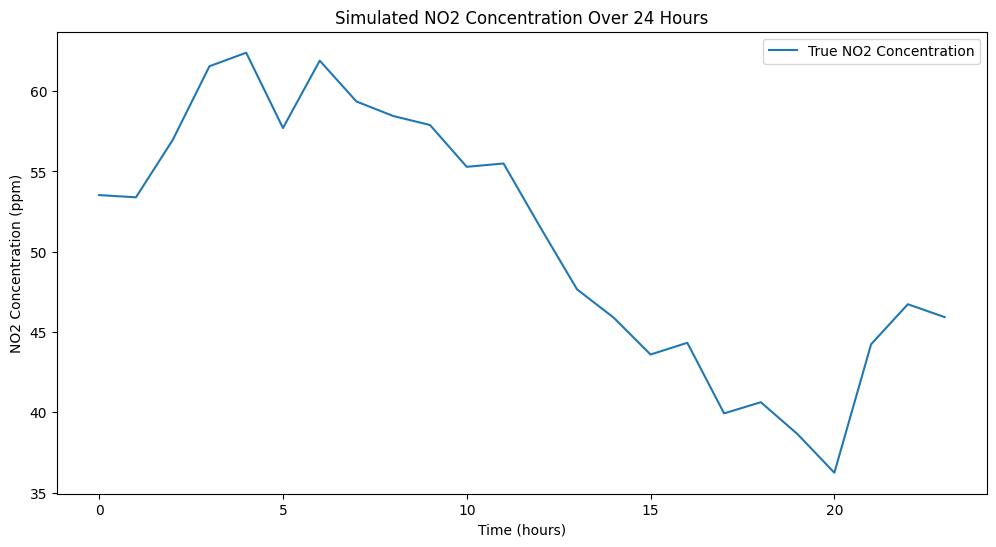

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating NO2 concentration data (in ppm) over 24 hours
np.random.seed(0)
hours = 24
time = np.arange(hours)
true_concentration = 50 + 10 * np.sin(2 * np.pi * time / 24) + np.random.normal(0, 2, hours)

plt.figure(figsize=(12, 6))
plt.plot(time, true_concentration, label='True NO2 Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration (ppm)')
plt.title('Simulated NO2 Concentration Over 24 Hours')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
scaler = MinMaxScaler()
scaled_concentration = scaler.fit_transform(true_concentration.reshape(-1, 1))

# Create sequences of 6 hours to predict the next hour
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 6
X, y = create_sequences(scaled_concentration, seq_length)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

model = LSTMModel()

# Define loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 100
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%10 == 0:
        print(f'Epoch {i+1} loss: {single_loss.item()}')

print(f'Epoch {epochs} loss: {single_loss.item()}')


Epoch 1 loss: 0.027176355943083763
Epoch 11 loss: 0.022421499714255333
Epoch 21 loss: 0.03289661929011345
Epoch 31 loss: 0.024796590209007263
Epoch 41 loss: 0.00887763500213623
Epoch 51 loss: 0.0018420107662677765
Epoch 61 loss: 4.245760283083655e-05
Epoch 71 loss: 1.7707717461235006e-06
Epoch 81 loss: 0.0005099357222206891
Epoch 91 loss: 0.0009055070113390684
Epoch 100 loss: 0.0011546635068953037


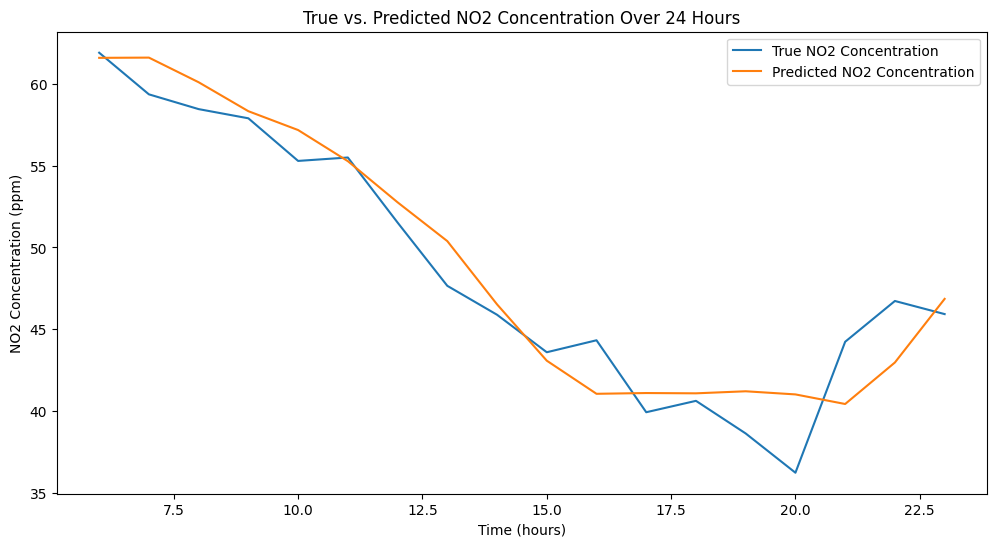

In [ ]:
# Make predictions
model.eval()
predictions = []

for seq in X_train:
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        predictions.append(model(seq).item())

# Rescale predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
true_values = scaler.inverse_transform(y_train.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[seq_length:], true_values, label='True NO2 Concentration')
plt.plot(time[seq_length:], predictions, label='Predicted NO2 Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration (ppm)')
plt.title('True vs. Predicted NO2 Concentration Over 24 Hours')
plt.legend()
plt.show()


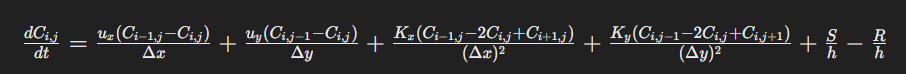

2d approximate advection

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # (x, y, t) -> hidden layer
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 1)  # hidden layer -> C

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the PDE residual
def pde_residual(model, x, y, t):
    C = model(torch.cat((x, y, t), dim=1))
    C_t = torch.autograd.grad(C, t, grad_outputs=torch.ones_like(C), create_graph=True)[0]
    C_x = torch.autograd.grad(C, x, grad_outputs=torch.ones_like(C), create_graph=True)[0]
    C_y = torch.autograd.grad(C, y, grad_outputs=torch.ones_like(C), create_graph=True)[0]
    C_xx = torch.autograd.grad(C_x, x, grad_outputs=torch.ones_like(C_x), create_graph=True)[0]
    C_yy = torch.autograd.grad(C_y, y, grad_outputs=torch.ones_like(C_y), create_graph=True)[0]

    ux, uy = 1.0, 1.0
    Kx, Ky = 0.1, 0.1
    S, R = 0.0, 0.0

    residual = C_t + ux * C_x + uy * C_y - Kx * C_xx - Ky * C_yy - S + R
    return residual

# Training data
N_train = 1000
x_train = torch.rand(N_train, 1) * 10.0
y_train = torch.rand(N_train, 1) * 10.0
t_train = torch.rand(N_train, 1) * 2.0
C_train = torch.exp(-((x_train - 5.0)**2 + (y_train - 5.0)**2))  # Initial condition

# Create the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute the loss
    C_pred = model(torch.cat((x_train, y_train, t_train), dim=1))
    residual = pde_residual(model, x_train, y_train, t_train)
    loss = torch.mean((C_pred - C_train)**2) + torch.mean(residual**2)

    # Backpropagation
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Create a grid for plotting
x = torch.linspace(0, 10, 100)
y = torch.linspace(0, 10, 100)
X, Y = torch.meshgrid(x, y)
X_flat, Y_flat = X.flatten(), Y.flatten()
t_plot = torch.full_like(X_flat, 2.0)  # Plotting at t = 2.0

# Predict the concentration field
C_pred = model(torch.cat((X_flat.unsqueeze(1), Y_flat.unsqueeze(1), t_plot.unsqueeze(1)), dim=1))
C_pred = C_pred.detach().numpy().reshape(100, 100)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), C_pred, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentration')
plt.title('2D Advection-Diffusion Equation (PINN)')
plt.show()


different code

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # (x, y, t) -> hidden layer
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 1)  # hidden layer -> c

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the PDE residual
def pde_residual(model, x, y, t, q, H, R, vd, ux, uy, c0, dx, dy):
    c = model(torch.cat((x, y, t), dim=1))
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    adv_x = ux / dx * (c0 - c)
    adv_y = uy / dy * (c0 - c)
    source_sink = q / H + R - vd / H * c

    residual = c_t - (source_sink + adv_x + adv_y)
    return residual

# Training data
N_train = 1000
x_train = torch.rand(N_train, 1) * 10.0
y_train = torch.rand(N_train, 1) * 10.0
t_train = torch.rand(N_train, 1) * 2.0
c0_train = torch.exp(-((x_train - 5.0)**2 + (y_train - 5.0)**2))  # Initial condition

# Constants
H = 1.0
q = torch.full((N_train, 1), 1.0)  # Source term
R = torch.full((N_train, 1), 0.0)  # Reaction term
vd = torch.full((N_train, 1), 0.1)  # Deposition velocity
ux, uy = 1.0, 1.0
dx, dy = 0.1, 0.1

# Create the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute the loss
    c_pred = model(torch.cat((x_train, y_train, t_train), dim=1))
    residual = pde_residual(model, x_train, y_train, t_train, q, H, R, vd, ux, uy, c0_train, dx, dy)
    loss = torch.mean((c_pred - c0_train)**2) + torch.mean(residual**2)

    # Backpropagation
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Create a grid for plotting
x = torch.linspace(0, 10, 100)
y = torch.linspace(0, 10, 100)
X, Y = torch.meshgrid(x, y)
X_flat, Y_flat = X.flatten(), Y.flatten()
t_plot = torch.full_like(X_flat, 2.0)  # Plotting at t = 2.0

# Predict the concentration field
c_pred = model(torch.cat((X_flat.unsqueeze(1), Y_flat.unsqueeze(1), t_plot.unsqueeze(1)), dim=1))
c_pred = c_pred.detach().numpy().reshape(100, 100)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), c_pred, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentration')
plt.title('2D Advection-Diffusion Equation (PINN)')
plt.show()



In [ ]:
!pip install "pina-mathlab"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 13.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x8

Epoch 0, Loss: 3867.194971431283
Epoch 2000, Loss: 43.10566341945965
Epoch 4000, Loss: 43.08922340034777


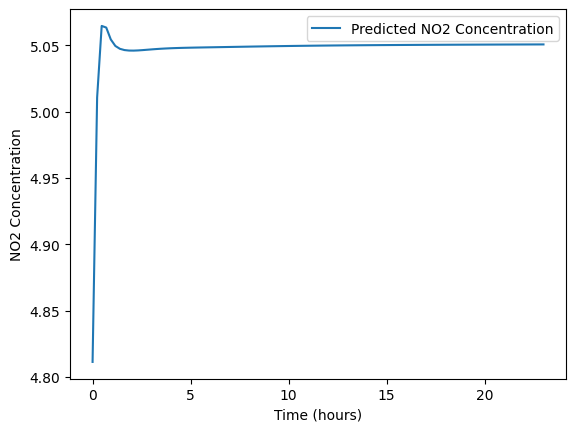

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input dimension: 1 (t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, t):
        x =t
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        c = self.fc5(x)
        return c

# Constants
H = 1500
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

# Lists to store parameter history
Hs = []

num_samples = 100
x_train = torch.zeros(num_samples, 1)  # x position (static for single sample)
y_train = torch.zeros(num_samples, 1)  # y position (static for single sample)
t_train = torch.linspace(0, 22, num_samples).view(-1, 1)  # Time from 0 to 22 hours

u_x = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['U10M'].values)])  # Convert generator to list
u_y = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['V10M'].values)])  # Convert generator to list# Hourly wind velocity in x and y directions

# Reshape the tensor to [1, 1, 1, 23] to make it compatible with interpolate
u_x = u_x.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_y_n = u_y_n.view(-1)

u_obs = torch.tensor(dataf['NO2'].values)


# Define the physics-informed loss function
def loss_function(model, t, c_initial, q_i, R_i):
    t.requires_grad_(True)

    c = model(t)

    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    loss1 = torch.mean((c_t - (q_i / H + R_i - (v_d_i / H) * c + (u_x_n / delta_x) * (c_initial - c) + (u_y_n / delta_y) * (c_initial - c)))**2)

    i = model( t_obs)
    loss2 = torch.mean((i.squeeze() - u_obs)**2)

    t_boundary = torch.zeros_like(t).requires_grad_(True)
    ls = model(t_boundary)
    loss3 = torch.mean((torch.squeeze(ls) - 3.8)**2)

    return loss1 + 1e-2 * loss2 + 1e-2 * loss3

model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

# Training loop
for epoch in range(6000):
    optimizer.zero_grad()
    loss = loss_function(model, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 2000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)


predicted_c = model(t_test).detach().numpy()

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2']*0.04059*46, label="Ground Truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


Epoch 0, Loss: 42504.74985658931
Epoch 1000, Loss: 7018.805703644269
Epoch 2000, Loss: 7012.050015562752
Epoch 3000, Loss: 6990.03977673834


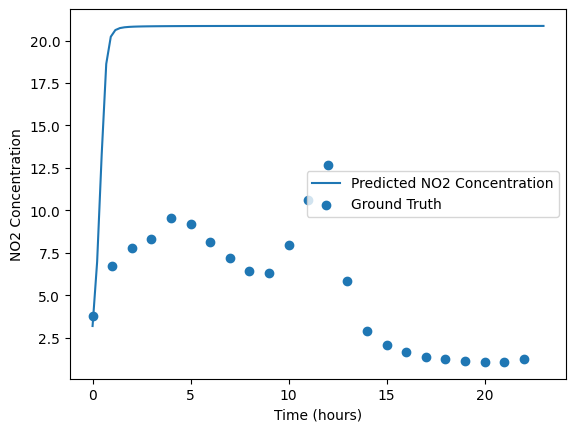

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input dimension: 1 (t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, t):
        x = torch.tanh(self.fc1(t))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        c = self.fc5(x)
        return c

# Constants
H = 1500
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

t_train = torch.linspace(0, 23, 100).view(-1, 1)  # Time from 0 to 22 hours

u_x = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['U10M'].values)])  # Convert generator to list
u_y = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['V10M'].values)])  # Convert generator to list# Hourly wind velocity in x and y directions


u_obs = dataf['NO2'].values


# Reshape and interpolate the tensor
u_x = u_x.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_y_n = u_y_n.view(-1)

t_obs = torch.linspace(0, 22, len(u_obs)).view(-1, 1)

def loss_function(model, t, c_initial, q_i, R_i):
    t.requires_grad_(True)
    c = model(t)
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    # PDE loss
    pde_loss_x = torch.mean((c_t - (q_i / H + R_i - (v_d_i / H) * c + (u_x_n / delta_x) * (c_initial - c)))**2)
    pde_loss_y = torch.mean((c_t - (q_i / H + R_i - (v_d_i / H) * c + (u_y_n / delta_y) * (c_initial - c)))**2)
    # Data matching loss
    i = model(t_obs)
    data_loss = torch.mean((i.squeeze() - torch.tensor(u_obs, dtype=torch.float32))**2)

    # Boundary condition loss
    t_boundary = torch.zeros_like(t).requires_grad_(True)
    ls = model(t_boundary)
    boundary_loss = torch.mean((torch.squeeze(ls) - c_initial)**2)

    # Regularization term
    reg_term = 0.01 * sum(p.pow(2.0).sum() for p in model.parameters())

    return pde_loss_x + pde_loss_y + data_loss + boundary_loss + reg_term


model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loss_function(model, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
predicted_c = model(t_test).detach().numpy()

# Denormalize the predictions
predicted_c = predicted_c

# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2'] * 0.04059 * 46, label="Ground Truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [ ]:
u_x

tensor([[[ 4982.0964,  7516.4371, 10858.3408, 11009.4380,  7502.1652,
           5673.8183,  5182.8514,  4844.7651,  4495.9381,  4208.9765,
           3868.9423,  3469.1234,  3216.6291,  4968.6944,  5044.5125,
           4967.5858,  5325.7818,  5428.6018,  5825.7232,  6235.0034,
           7198.9469,  8746.0287, 11130.9228]]], dtype=torch.float64)

Epoch 0, Loss: 3182.020263671875
Epoch 1000, Loss: 109.3914794921875
Epoch 2000, Loss: 74.84772491455078
Epoch 3000, Loss: 74.45790100097656
Epoch 4000, Loss: 74.05984497070312
Epoch 5000, Loss: 73.71409606933594
Epoch 6000, Loss: 73.56289672851562
Epoch 7000, Loss: 73.43783569335938
Epoch 8000, Loss: 73.38965606689453
Epoch 9000, Loss: 73.3721694946289


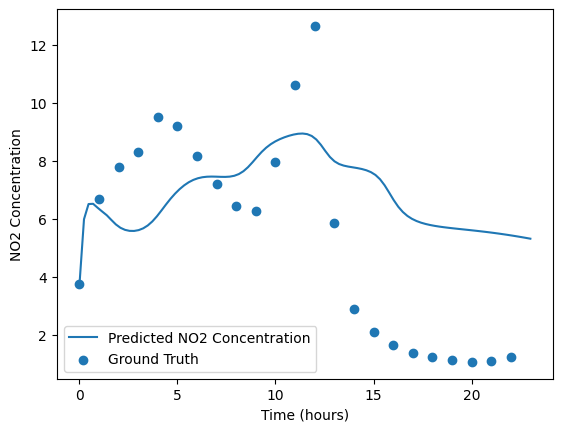

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input dimension: 1 (t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, t):
        x = torch.tanh(self.fc1(t))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        c = self.fc5(x)
        return c

# Constants
H = 1500
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

t_train = torch.linspace(0, 23, 100).view(-1, 1)  # Time from 0 to 22 hours

u_x = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['U10M'].values)])  # Convert generator to list
u_y = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['V10M'].values)])  # Convert generator to list# Hourly wind velocity in x and y directions


u_obs = dataf['NO2'].values


# Reshape and interpolate the tensor
u_x = u_x.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_y_n = u_y_n.view(-1)

t_obs = torch.linspace(0, 22, len(u_obs)).view(-1, 1)

def loss_function(model, t, c_initial, q_i, R_i):
    t.requires_grad_(True)
    c = model(t)
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    pde_loss_x = torch.mean(torch.stack([(c_t[_] - (q_i / H + R_i - (v_d_i / H) * c + (u_x_n[_] / delta_x) * (c_initial - c[_])))**2 for _ in range(100)]))
    pde_loss_y = torch.mean(torch.stack([(c_t[_] - (q_i / H + R_i - (v_d_i / H) * c + (u_y_n[_] / delta_y) * (c_initial - c[_])))**2 for _ in range(100)]))

    # Data matching loss
    i = model(t_obs)
    data_loss = torch.mean((i.squeeze() - torch.tensor(u_obs, dtype=torch.float32))**2)
    # Boundary condition loss
    t_boundary = torch.zeros_like(t).requires_grad_(True)
    ls = model(t_boundary)
    boundary_loss = torch.mean((torch.squeeze(ls) - c_initial)**2)

    # # Regularization term
    # reg_term = 0.01 * sum(p.pow(2.0).sum() for p in model.parameters())

    return pde_loss_x + pde_loss_y + data_loss + boundary_loss # + reg_term


model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loss_function(model, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
predicted_c = model(t_test).detach().numpy()


# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2'] * 0.04059 * 46, label="Ground Truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [ ]:
predicted_c[0]

array([4.7945595], dtype=float32)

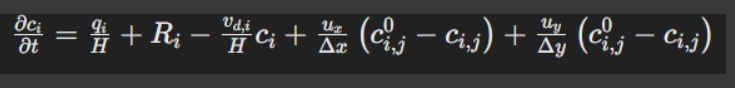

Epoch 0, Loss: 3443.813232421875
Epoch 1000, Loss: 134.27529907226562
Epoch 2000, Loss: 117.12654113769531
Epoch 3000, Loss: 75.15254974365234
Epoch 4000, Loss: 74.22042846679688
Epoch 5000, Loss: 73.81151580810547
Epoch 7000, Loss: 73.47396087646484
Epoch 8000, Loss: 73.39957427978516
Epoch 9000, Loss: 73.35030364990234


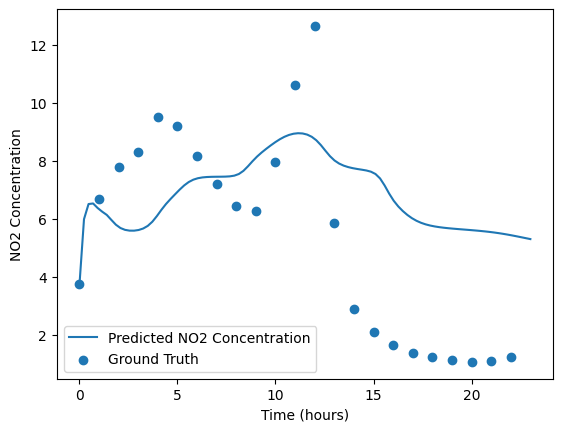

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input dimension: 1 (t)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, t):
        x = torch.tanh(self.fc1(t))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        c = self.fc5(x)
        return c

# Constants
H = 1500
q_i = 18000   # Emission rate
R_i = 4.7035   # Chemical production rate
v_d_i = 18   # Dry deposition velocity
u = 10000  # Wind speed
l = 1000 # Characteristic length
c_initial = 3.8  # Background concentration
delta_x = 1000  # Spatial step in x direction
delta_y = 1000  # Spatial step in y direction

t_train = torch.linspace(0, 23, 100).view(-1, 1)  # Time from 0 to 22 hours

u_x = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['U10M'].values)])  # Convert generator to list
u_y = torch.tensor([i*3600 if i>0 else i*-1*3600 for i in (dataf['V10M'].values)])  # Convert generator to list# Hourly wind velocity in x and y directions


u_obs = dataf['NO2'].values


# Reshape and interpolate the tensor
u_x = u_x.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_x_n = F.interpolate(u_x, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_x_n = u_x_n.view(-1)

u_y = u_y.view(1, 1, -1)

# Interpolate to size 100
new_size = 100
u_y_n = F.interpolate(u_y, size=new_size, mode='linear', align_corners=True)

# Reshape back to the original form
u_y_n = u_y_n.view(-1)

t_obs = torch.linspace(0, 22, len(u_obs)).view(-1, 1)

def loss_function(model, t, c_initial, q_i, R_i):
    t.requires_grad_(True)
    c = model(t)
    c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True)[0]

    pde_loss_x = torch.mean(torch.stack([(c_t[_] - (q_i / H + R_i - (v_d_i / H) * c + (u_x_n[_] / delta_x) * (c_initial - c[_])))**2 for _ in range(100)]))
    pde_loss_y = torch.mean(torch.stack([(c_t[_] - (q_i / H + R_i - (v_d_i / H) * c + (u_y_n[_] / delta_y) * (c_initial - c[_])))**2 for _ in range(100)]))

    # Data matching loss
    i = model(t_obs)
    # data_loss = torch.mean((i.squeeze() - torch.tensor(u_obs, dtype=torch.float32))**2)
    data_loss = torch.mean(torch.stack([(i[_] - torch.tensor(u_obs[_]))**2 for _ in range(len(u_obs))]))
    # Boundary condition loss
    t_boundary = torch.tensor([0.]).requires_grad_(True)
    ls = model(t_boundary)
    # boundary_loss = torch.mean((torch.squeeze(ls) - c_initial)**2)
    # c_init  = torch.empty_like(ls)
    # c_init = torch.fill_(ls,c_initial)
    boundary_loss = torch.mean((ls - c_initial)**2)

    # # Regularization term
    # reg_term = 0.01 * sum(p.pow(2.0).sum() for p in model.parameters())

    return pde_loss_x + pde_loss_y + data_loss + boundary_loss # + reg_term


model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loss_function(model, t_train, c_initial, q_i, R_i)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Prediction for plotting
t_test = torch.linspace(0, 23, 100).unsqueeze(1)
predicted_c = model(t_test).detach().numpy()


# Plot results
plt.plot(t_test.numpy(), predicted_c, label='Predicted NO2 Concentration')
plt.scatter(dataf.reset_index().index, dataf['NO2'] * 0.04059 * 46, label="Ground Truth")
plt.xlabel('Time (hours)')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()
